# **Project Name**    - Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce 

##### **Project Type**    - Recommendation, Unsupervised learning
##### **Contribution**    - Individual
##### **Dharmraj Patil**

# **GitHub Link -**

# **Problem Statement**

**The global e-commerce industry generates vast amounts of transaction data daily, offering 
valuable insights into customer purchasing behaviors. Analyzing this data is essential for 
identifying meaningful customer segments and recommending relevant products to enhance 
customer experience and drive business growth. This project aims to examine transaction 
data from an online retail business to uncover patterns in customer purchase behavior, 
segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and 
develop a product recommendation system using collaborative filtering techniques.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading and viewing

In [2]:
df = pd.read_csv("online_retail.csv")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate values: {duplicates.shape}")
print(duplicates)

Number of duplicate values: (5268, 8)
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

                InvoiceDate  UnitPrice  CustomerID         Co

In [7]:
total_nulls = df.isnull().sum()
total_nulls

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

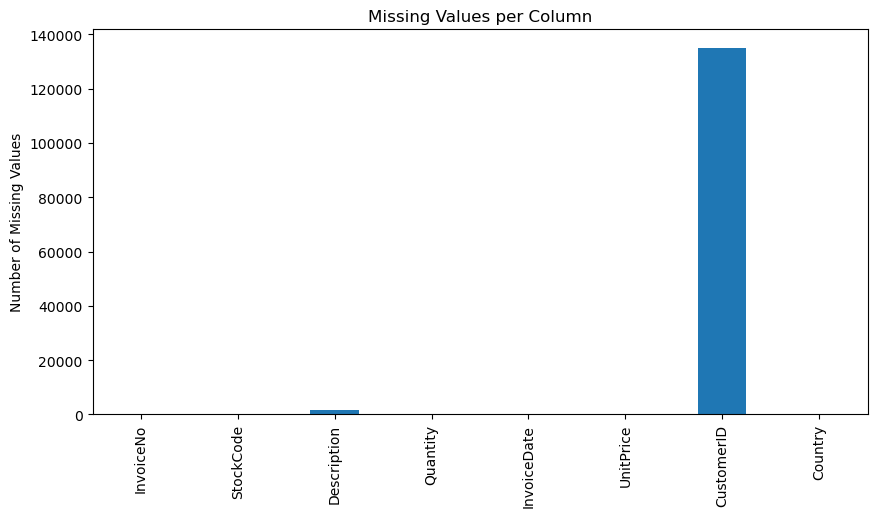

In [8]:
df.isnull().sum().plot(kind='bar', figsize=(10, 5), title='Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.show()

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
for col in df.columns:
    print(f"{col} : {df[col].nunique()} unique values")

InvoiceNo : 25900 unique values
StockCode : 4070 unique values
Description : 4223 unique values
Quantity : 722 unique values
InvoiceDate : 23260 unique values
UnitPrice : 1630 unique values
CustomerID : 4372 unique values
Country : 38 unique values


### Data Cleaning

In [11]:
df.dropna(axis=0, subset=['CustomerID'], inplace=True)

In [12]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [13]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [14]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### EDA

C:\Users\patil\AppData\Local\Temp\ipykernel_20648\1620450185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


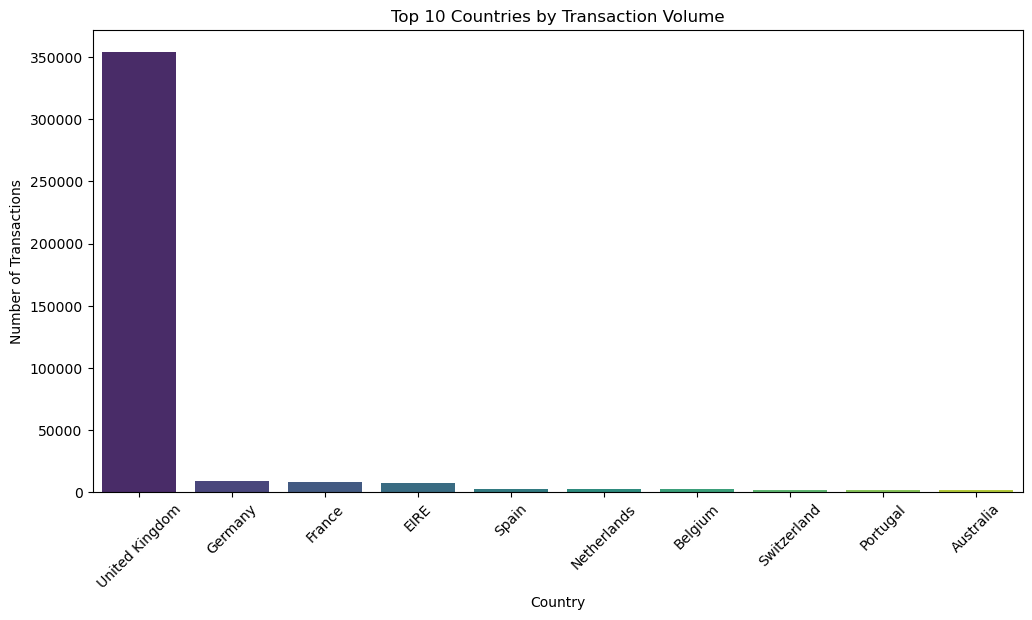

In [16]:
country_counts = df['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 10 Countries by Transaction Volume')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

C:\Users\patil\AppData\Local\Temp\ipykernel_20648\40950437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='crest')


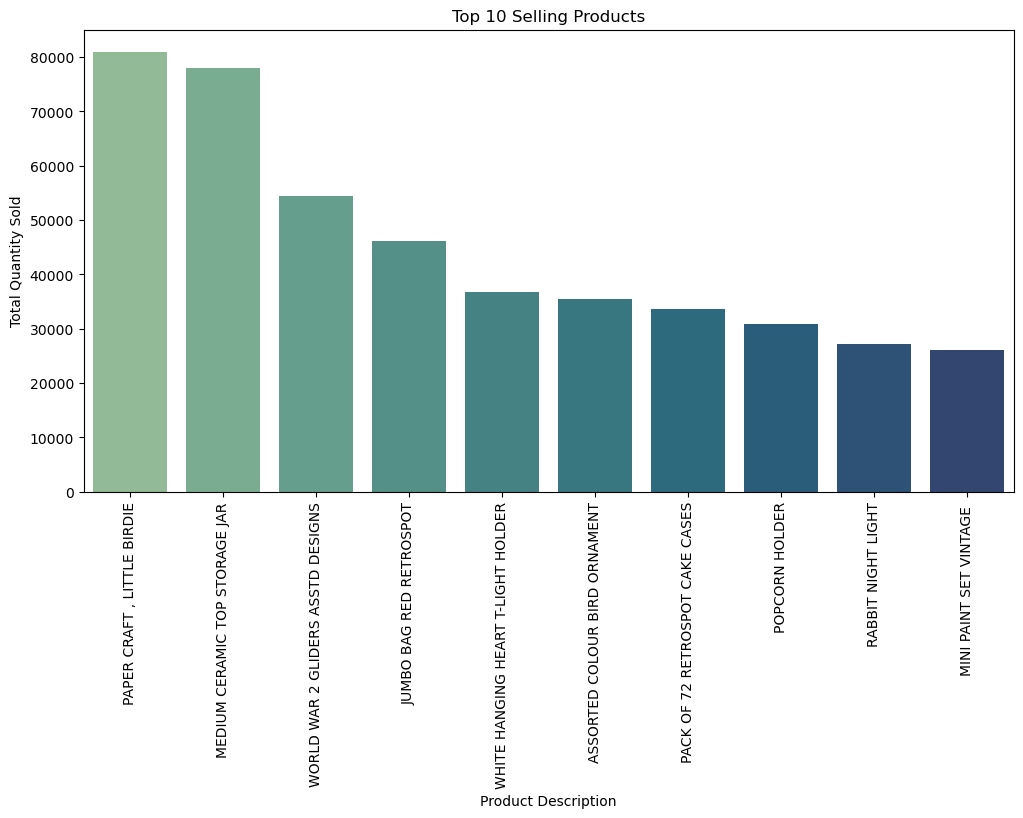

In [17]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='crest')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.show()

In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

In [19]:
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalPrice': 'Monetary'}, inplace=True)

### Data Preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

##### Standardizing the RMF values

In [21]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

##### Using Elbow Method to find the optimal number of clusters

In [22]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

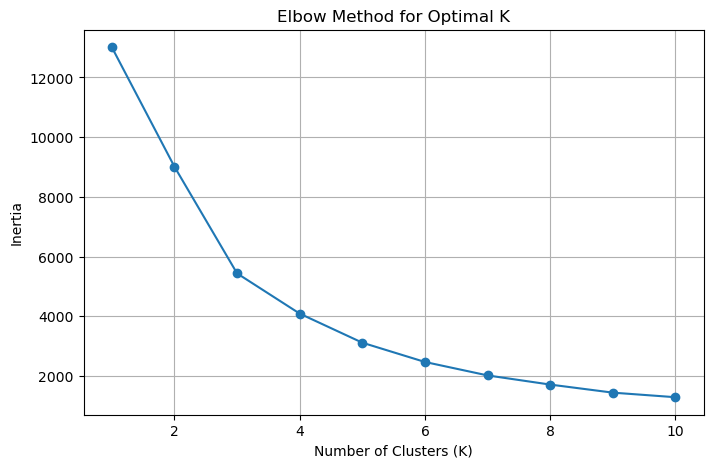

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Run K-Means Clustering

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [25]:
cluster_map = {
    0: 'At-Risk',
    1: 'High-Value',
    2: 'Occasional',
    3: 'Regular'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_map)

#### Visualizing Clusters

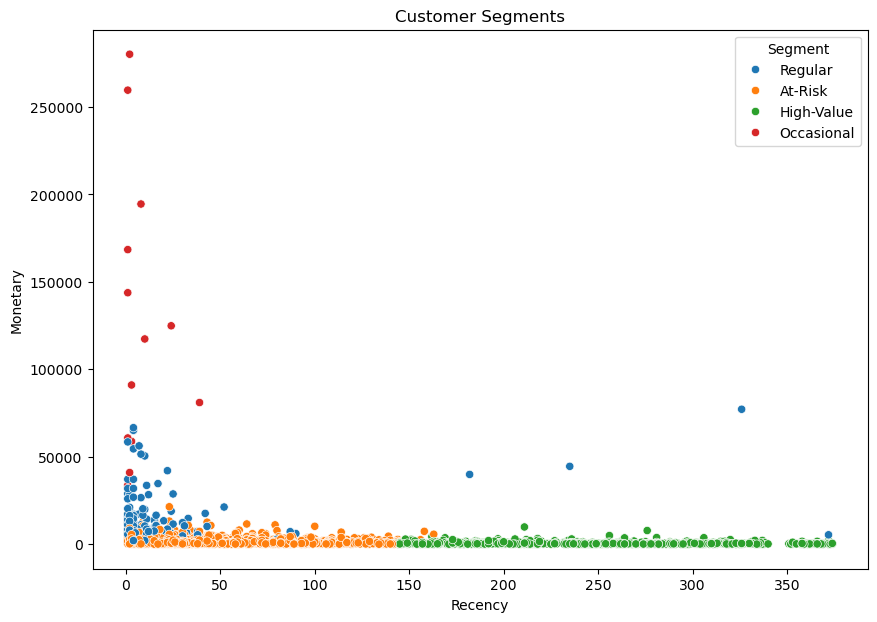

In [26]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='tab10')
plt.title('Customer Segments')
plt.show()

#### Saving Clustering model

In [27]:
import pickle

In [28]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

### Recommendation System (Item-based Collaborative Filtering)

In [29]:
customer_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum')
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\patil\AppData\Local\Temp\ipykernel_20648\3381819718.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)


In [30]:
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(customer_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=customer_item_matrix.columns, columns=customer_item_matrix.columns)

In [31]:
stockcode_to_desc = df.drop_duplicates(subset=['StockCode', 'Description']).set_index('StockCode')['Description']

#### Saving Recommendation Model

In [32]:
with open('item_similarity_df.pkl', 'wb') as f:
    pickle.dump(item_similarity_df, f)
with open('stockcode_to_desc.pkl', 'wb') as f:
    pickle.dump(stockcode_to_desc, f)

print("\nRecommendation system data saved successfully.")
print("\nAnalysis and model training complete.")


Recommendation system data saved successfully.

Analysis and model training complete.
